In [5]:
import numpy as np
import pandas as pd

# Load data into memory
data = pd.read_csv('train.csv')

# Inspect the data
print(f"Shape of the data: {data.shape}")
print("")
print(data.head())

Shape of the data: (42000, 785)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783

In [15]:
# Convert data into a matrix
data = np.array(data)

# Split data into a matrix X and a vector Y where:
#
# X is dimension (42000, 784)
# Y is dimension (42000, )
# Y is the first column of data, while X is the rest
X = data[:, 1:]
X = X.T
Y = data[:, 0]

print(X.shape, Y.shape)

d, N = X.shape

(784, 42000) (42000,)


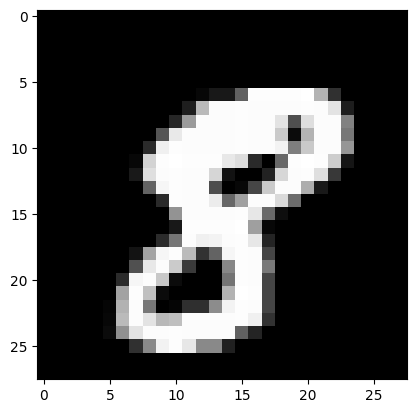

The associated digit is: 8


In [7]:
import matplotlib.pyplot as plt

def visualize(X, idx):
    # Visualize the image of index 'idx' from the dataset 'X'

    # Load an image in memory
    img = X[:, idx]
    
    # Reshape it
    img = np.reshape(img, (28, 28))

    # Visualize
    plt.imshow(img, cmap='gray')
    plt.show()

# Visualize image number 10 and the corresponding digit.
idx = 10
visualize(X, idx)
print(f"The associated digit is: {Y[idx]}")

In [8]:
def split_data(X, Y, N_train):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    X_train = X[:, train_idx]
    Y_train = Y[train_idx]
    
    X_test = X[:, test_idx]
    Y_test = Y[test_idx]

    return (X_train, Y_train), (X_test, Y_test)

# Test it
(X_train, Y_train), (X_test, Y_test) = split_data(X, Y, 30_000)

print(X_train.shape, X_test.shape)

(784, 30000) (784, 12000)


In [9]:
# Compute centroid
cX = np.mean(X, axis=1)

# Make it a column vector
cX = np.reshape(cX, (d, 1))
print(cX.shape)

# Center the data
Xc = X - cX

# Compute SVD decomposition
U, s, VT = np.linalg.svd(Xc, full_matrices=False)

# Given k, compute reduced SVD
k = 2
Uk = U[:, :k]

# Define projection matrix
P = Uk.T

# Project X_train -> Z_train
Z_train = P @ X_train
print(Z_train.shape)

(784, 1)
(2, 30000)


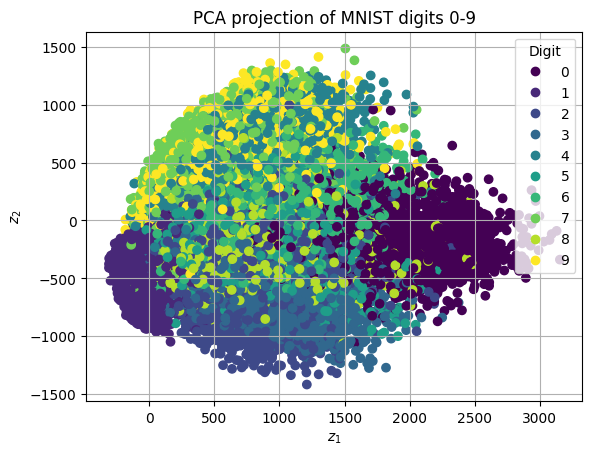

In [10]:
# Visualize the clusters
ax = plt.scatter(Z_train[0, :], Z_train[1, :], c=Y_train)
plt.legend(*ax.legend_elements(), title="Digit") # Add to the legend the list of digits
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA projection of MNIST digits 0-9")
plt.grid()
plt.show()

(784, 6400) (784, 2347)
(784, 1)
(2, 6400)


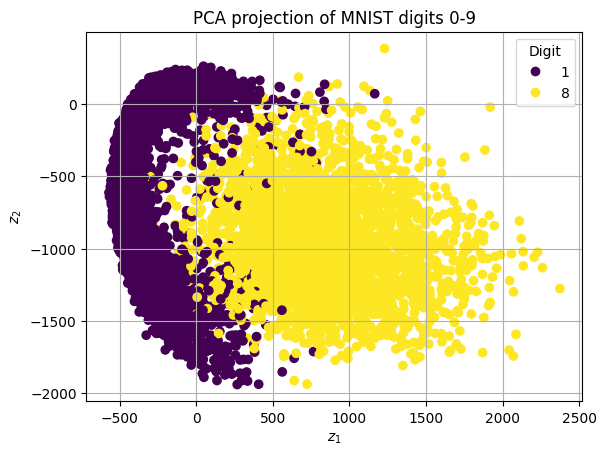

In [22]:
# Define the boolean array to filter out digits
filter_3or4 = (Y==1) | (Y==8)

# Define the filtered data
X_3or4 = X[:, filter_3or4]
Y_3or4 = Y[filter_3or4]

# Test it
(X_train, Y_train), (X_test, Y_test) = split_data(X_3or4, Y_3or4, 6400)

print(X_train.shape, X_test.shape)

# Compute centroid
cX_3or4 = np.mean(X_3or4, axis=1)

# Make it a column vector
cX_3or4 = np.reshape(cX, (d, 1))
print(cX_3or4.shape)

# Center the data
Xc_3or4 = X_3or4 - cX_3or4

# Compute SVD decomposition
U, s, VT = np.linalg.svd(Xc_3or4, full_matrices=False)

# Given k, compute reduced SVD
k = 2
Uk = U[:, :k]

# Define projection matrix
P = Uk.T

# Project X_train -> Z_train
Z_train = P @ X_train
print(Z_train.shape)

# Visualize the clusters
ax = plt.scatter(Z_train[0, :], Z_train[1, :], c=Y_train)
plt.legend(*ax.legend_elements(), title="Digit") # Add to the legend the list of digits
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA projection of MNIST digits 0-9")
plt.grid()
plt.show()